# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [5]:
# Imports the necessary libraries

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology 

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

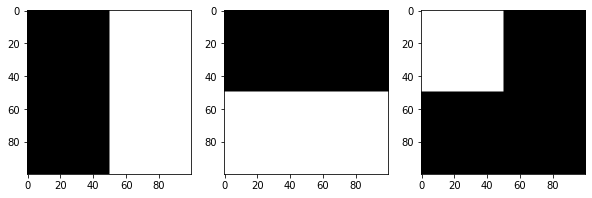

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


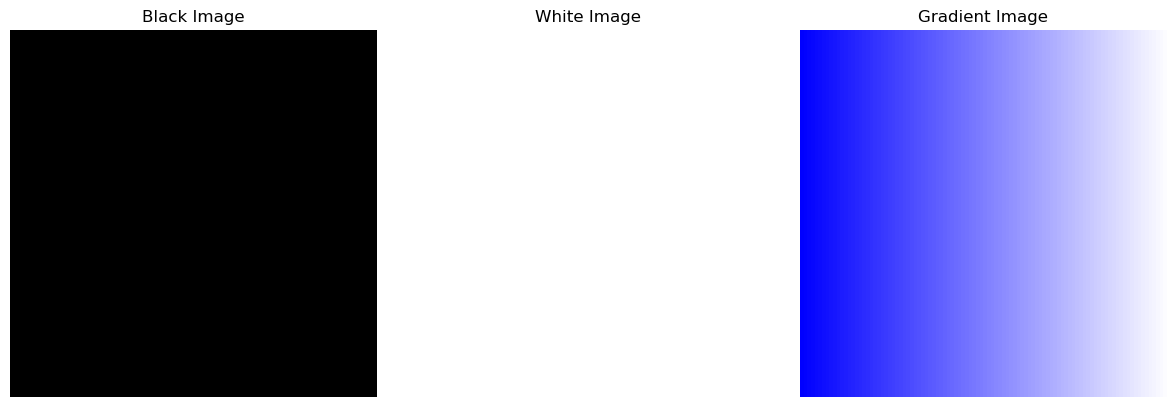

In [7]:
# Creates the images
image1 = np.zeros((100, 100, 3), dtype=np.uint8)  # Black image
image2 = np.ones((100, 100, 3), dtype=np.uint8) * 255  # White image
image3 = np.zeros((100, 100, 3), dtype=np.uint8)  # Gradient image
for i in range(100):
    image3[:, i] = [i * 255 // 100, i * 255 // 100, 255]  # Gradient from blue to cyan

# Plots the images in a 1 x 3 subplot
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(image1)
axes[0].axis('off')
axes[0].set_title('Black Image')

axes[1].imshow(image2)
axes[1].axis('off')
axes[1].set_title('White Image')

axes[2].imshow(image3)
axes[2].axis('off')
axes[2].set_title('Gradient Image')

plt.tight_layout()
plt.show()

*   Use the above three images to create the following image

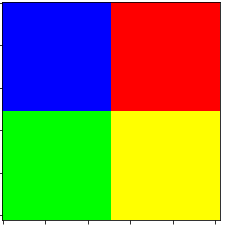
*Hint: Remember channels and color spaces*

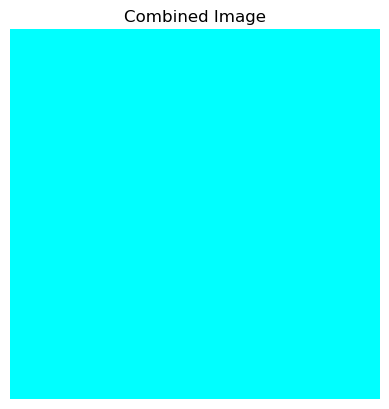

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Creates the images
image1 = np.zeros((100, 100, 3), dtype=np.uint8)  # Black image
image2 = np.ones((100, 100, 3), dtype=np.uint8) * 255  # White image
image3 = np.zeros((100, 100, 3), dtype=np.uint8)  # Gradient image
for i in range(100):
    image3[:, i] = [i * 255 // 100, i * 255 // 100, 255]  # Gradient from blue to cyan

# Creates a new image using the channels of the above images
combined_image = np.zeros((100, 100, 3), dtype=np.uint8)
combined_image[..., 0] = image1[..., 0]  # Red channel from image1
combined_image[..., 1] = image2[..., 1]  # Green channel from image2
combined_image[..., 2] = image3[..., 2]  # Blue channel from image3

# Displays the combined image
plt.imshow(combined_image)
plt.axis('off')
plt.title('Combined Image')
plt.show()


### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

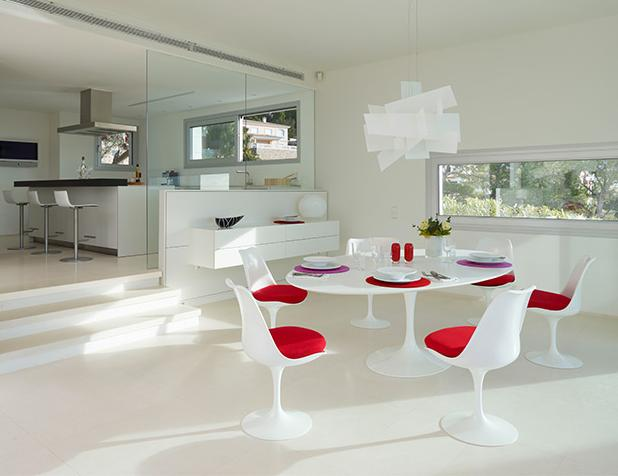

*   Extract individual channels and plot them using matplotlib subplot.



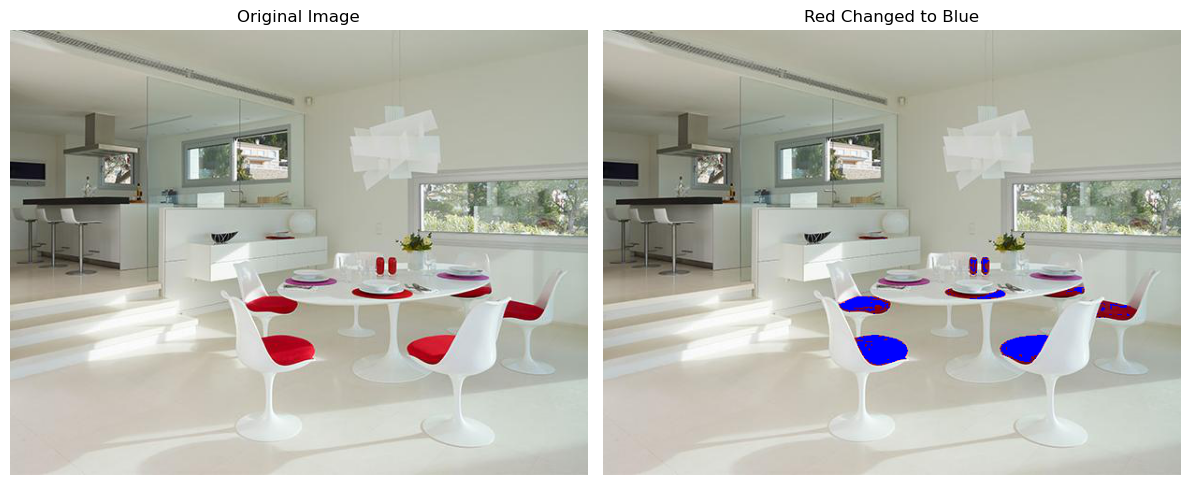

In [113]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/Users/sylviaperez-montero/Desktop/lab-computer-vision-main/images/sillas.jpg"  # Path to the uploaded image
image = Image.open(image_path)
image_rgb = image.convert("RGB")

# Convert the image to a numpy array
image_array = np.array(image_rgb)

# Define thresholds to detect red color
red_threshold = 150  # Adjust as needed to capture different intensities of red
green_threshold = 100  # Adjust as needed for green tolerance
blue_threshold = 100  # Adjust as needed for blue tolerance

# Create a mask for red areas
red_mask = (image_array[:, :, 0] > red_threshold) & \
           (image_array[:, :, 1] < green_threshold) & \
           (image_array[:, :, 2] < blue_threshold)

# Replace red with blue
new_image_array = image_array.copy()
new_image_array[red_mask] = [0, 0, 255]  # Change to pure blue

# Convert back to an image
new_image = Image.fromarray(new_image_array)

# Visualize the original and modified images
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Original image
axs[0].imshow(image_rgb)
axs[0].set_title("Original Image")
axs[0].axis("off")

# Modified image
axs[1].imshow(new_image)
axs[1].set_title("Red Changed to Blue")
axs[1].axis("off")

# Show the plots
plt.tight_layout()
plt.show()

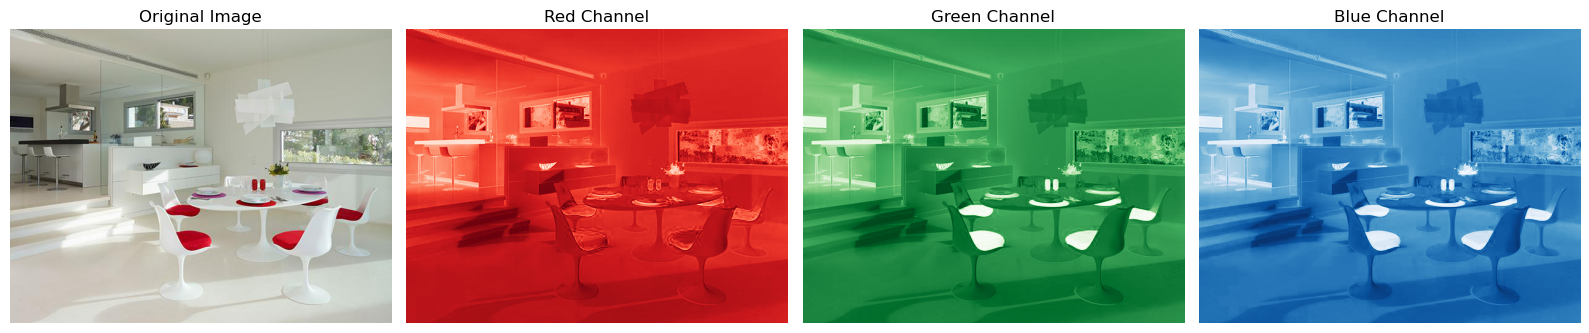

In [13]:
# Extracts individual channels from the sillas image and plots them using matplotlib subplot

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Loads the image
image_path = "/Users/sylviaperez-montero/Desktop/lab-computer-vision-main/images/sillas.jpg"  
image = Image.open(image_path)

# Converts the image to RGB
image_rgb = image.convert("RGB")

# Splits the image into RGB channels
r, g, b = image_rgb.split()

# Converts channels to numpy arrays
r_array = np.array(r)
g_array = np.array(g)
b_array = np.array(b)

# Plot the original image and the three channels
fig, axs = plt.subplots(1, 4, figsize=(16, 6))

# Original image
axs[0].imshow(image_rgb)
axs[0].set_title("Original Image")
axs[0].axis("off")

# Red channel
axs[1].imshow(r_array, cmap="Reds")
axs[1].set_title("Red Channel")
axs[1].axis("off")

# Green channel
axs[2].imshow(g_array, cmap="Greens")
axs[2].set_title("Green Channel")
axs[2].axis("off")

# Blue channel
axs[3].imshow(b_array, cmap="Blues")
axs[3].set_title("Blue Channel")
axs[3].axis("off")

# Show the plots
plt.tight_layout()
plt.show()



*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

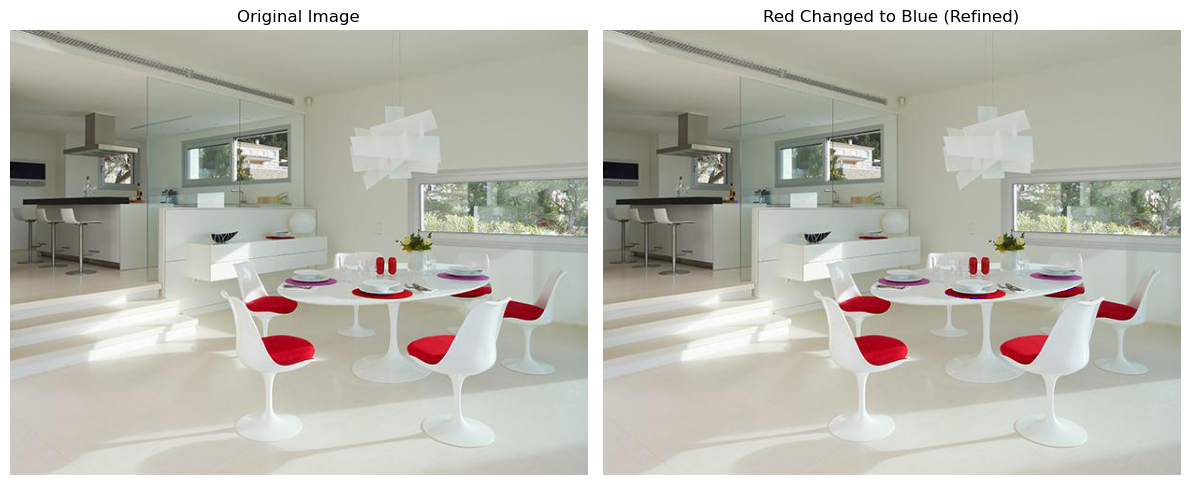

In [121]:
# Changes all red in the original photo to blue, applying a Gaussian filter for smoothing

# Imports the necessary libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from skimage import feature

# Loads the image
image_path = "/Users/sylviaperez-montero/Desktop/lab-computer-vision-main/images/sillas.jpg"
image = Image.open(image_path)
image_rgb = image.convert("RGB")

# Converts the image to a numpy array
image_array = np.array(image_rgb)

# Applies Gaussian filter for smoothing
sigma = 2.0  # Control smoothing level
smoothed_image = gaussian_filter(image_array[..., 0], sigma=sigma)  # Apply to the red channel

# Detects edges using Canny on the smoothed red channel
edges = feature.canny(smoothed_image, sigma=1.0, low_threshold=50, high_threshold=150)

# Refines the red mask with the edge detection
red_threshold = 120
green_threshold = 100
blue_threshold = 100

red_mask_refined = edges & (
    (image_array[..., 0] > red_threshold) &  # Red above threshold
    (image_array[..., 1] < green_threshold) &  # Green below threshold
    (image_array[..., 2] < blue_threshold)  # Blue below threshold
)

# Replaces red with blue based on the refined mask
new_image_array_refined = image_array.copy()
new_image_array_refined[red_mask_refined] = [0, 0, 255]  # Replace with pure blue

# Converts back to an image
new_image_refined = Image.fromarray(new_image_array_refined)

# Visualizes the original and modified images
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Original image
axs[0].imshow(image_rgb)
axs[0].set_title("Original Image")
axs[0].axis("off")

# Modified image
axs[1].imshow(new_image_refined)
axs[1].set_title("Red Changed to Blue (Refined)")
axs[1].axis("off")

# Show the plots
plt.tight_layout()
plt.show()

# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

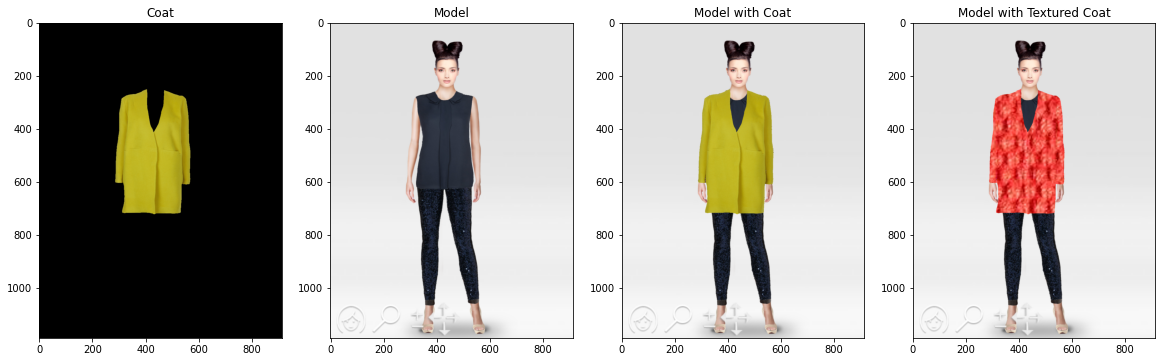

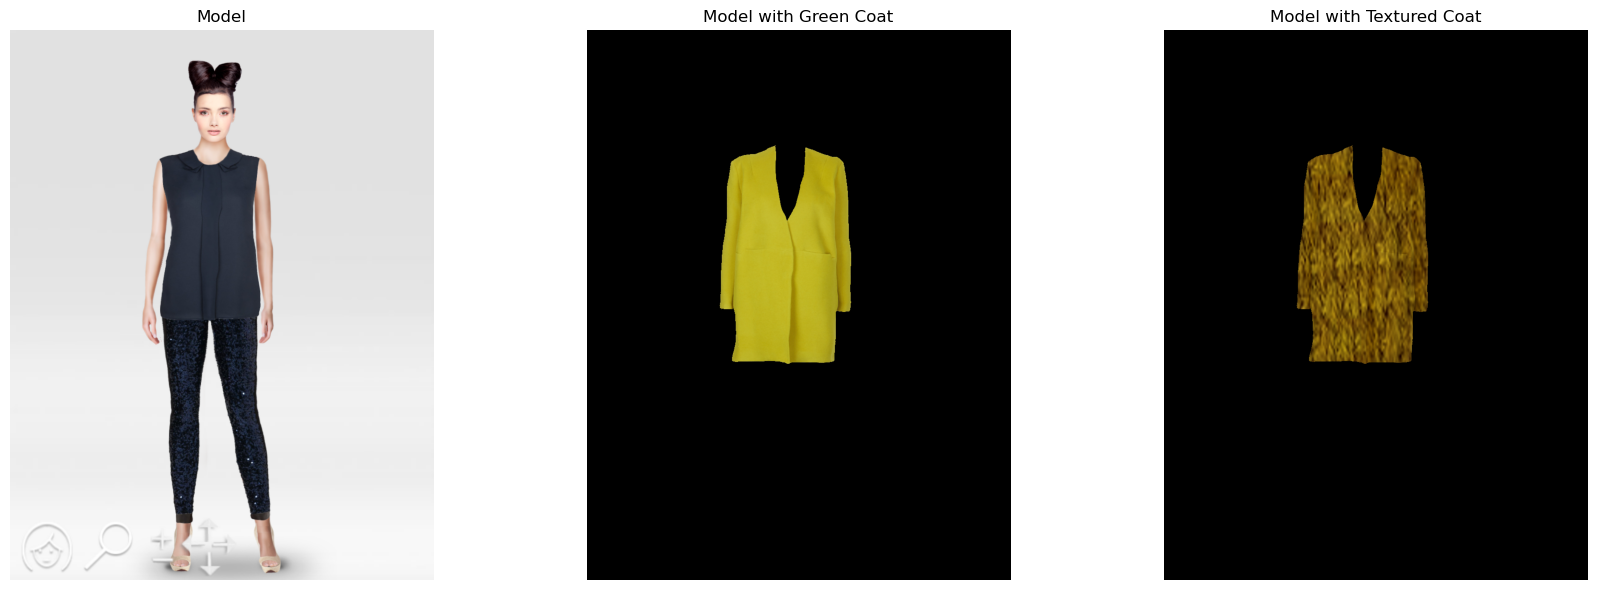

In [141]:
from PIL import Image, ImageChops
import matplotlib.pyplot as plt

# Load the model and coat images
model_path = "/Users/sylviaperez-montero/Desktop/lab-computer-vision-main/images//model.png"
coat_path = "/Users/sylviaperez-montero/Desktop/lab-computer-vision-main/images//coat.png"
texture_path = "/Users/sylviaperez-montero/Desktop/lab-computer-vision-main/images//texture.png"

model = Image.open(model_path).convert("RGBA")
coat = Image.open(coat_path).convert("RGBA")

# Create a mask to remove the black background from the coat image
coat_mask = coat.split()[3]  # Use the alpha channel as a mask

# Blend the coat onto the model using the mask
model_with_coat = Image.alpha_composite(model, Image.composite(coat, model, coat_mask))

# Load a texture image and apply it to the coat
texture = Image.open(texture_path).convert("RGBA")
texture_resized = texture.resize(coat.size)

# Apply the texture to the coat
textured_coat = ImageChops.multiply(coat, texture_resized)

# Blend the textured coat onto the model using the same mask
model_with_textured_coat = Image.alpha_composite(model, Image.composite(textured_coat, model, coat_mask))

# Visualization of the images
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Original Model
axs[0].imshow(model)
axs[0].set_title("Model")
axs[0].axis("off")

# Model Wearing Green Coat
axs[1].imshow(model_with_coat)
axs[1].set_title("Model with Green Coat")
axs[1].axis("off")

# Model Wearing Textured Coat
axs[2].imshow(model_with_textured_coat)
axs[2].set_title("Model with Textured Coat")
axs[2].axis("off")

plt.tight_layout()
plt.show()

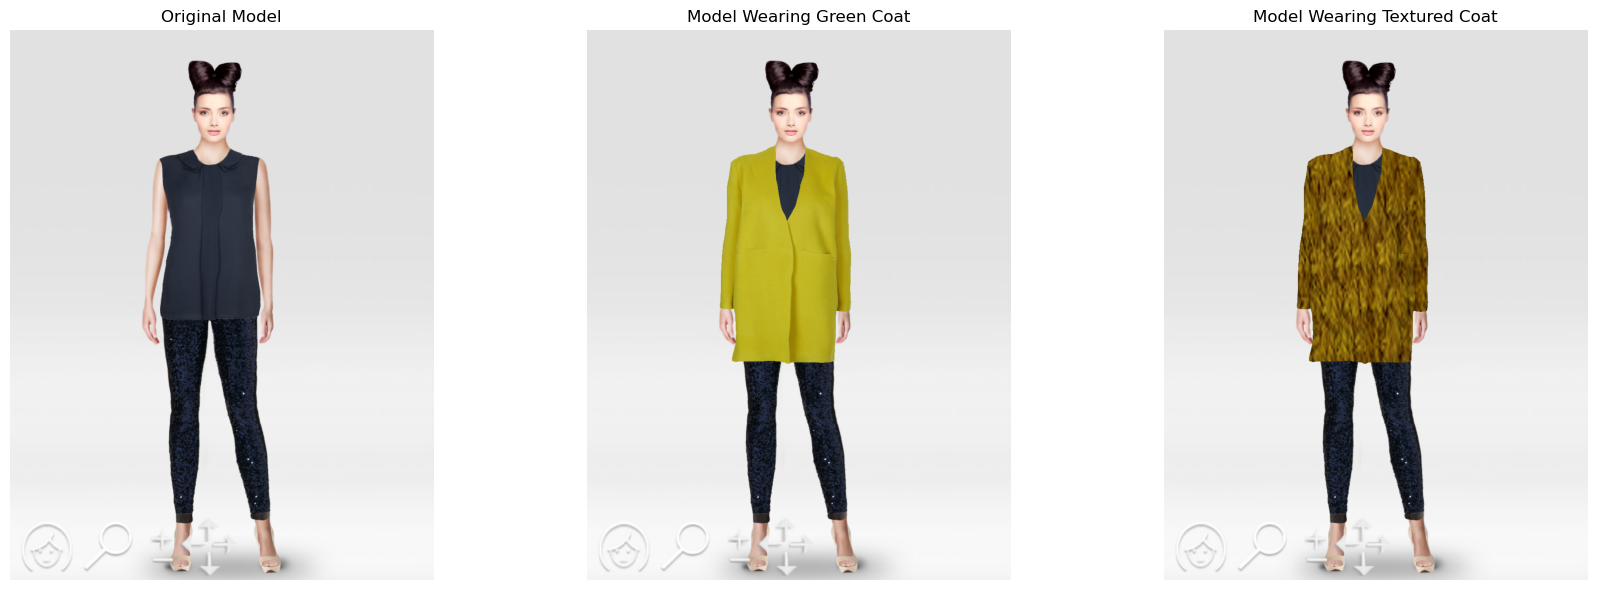

In [167]:
# Overlays the coat over the model, and then adds texture over the coat.
# The three images are shown side by side.

# Imports the necessary libraries
from PIL import Image
import matplotlib.pyplot as plt

# Opens the images (used as the background)
background_path = "/Users/sylviaperez-montero/Desktop/lab-computer-vision-main/images/model.png"  # Replace with the actual path
overlay_path = "/Users/sylviaperez-montero/Desktop/lab-computer-vision-main/images/coat.png"       # Replace with the actual path
texture_path = "/Users/sylviaperez-montero/Desktop/lab-computer-vision-main/images/texture2.png"       # Replace with the actual path

img1 = Image.open(background_path).convert("RGBA")  # Ensures the background is in RGBA mode
img2 = Image.open(overlay_path).convert("RGBA")     # Ensures the overlay is in RGBA mode
img3 = Image.open(texture_path).convert("RGBA")     # Ensures the texture is in RGBA model

# Creates a mask to remove the black background from img2 (only keeping the green coat)
img2_data = img2.getdata()
new_data = []

for item in img2_data:
    # Checks if the pixel is black 
    if item[0] < 50 and item[1] < 50 and item[2] < 50:  # Close to black
        new_data.append((0, 0, 0, 0))  # Makes the pixel fully transparent
    else:
        new_data.append(item)  # Keeps the pixel as is

# Applies the new transparency data to img2
img2.putdata(new_data)

# Overlays img2 (green coat) onto img1 (model)
combined_image = img1.copy()
combined_image.paste(img2, (0, 0), img2)  # Use img2's alpha channel as the mask

# Resizes the texture to match the size of img2 (green coat)
texture_resized = texture.resize(img2.size)

# Applies the texture to the green coat using multiply blend mode
textured_coat = ImageChops.multiply(img2, texture_resized)

# Overlays the textured coat unto the model
combined_image_with_texture = img1.copy()
combined_image_with_texture.paste(textured_coat, (0, 0), textured_coat)  # Use the alpha channel as the mask

# Visualizes the images: original model, model with green coat, and model with textured coat
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Original model (img1)
axs[0].imshow(img1)
axs[0].set_title("Original Model")
axs[0].axis("off")

# Model wearing green coat (img1 + img2)
axs[1].imshow(combined_image)
axs[1].set_title("Model Wearing Green Coat")
axs[1].axis("off")

# Model wearing textured coat (img1 + img2 + texture)
axs[2].imshow(combined_image_with_texture)
axs[2].set_title("Model Wearing Textured Coat")
axs[2].axis("off")

# Displays the image side by side
plt.tight_layout()
plt.show()

# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




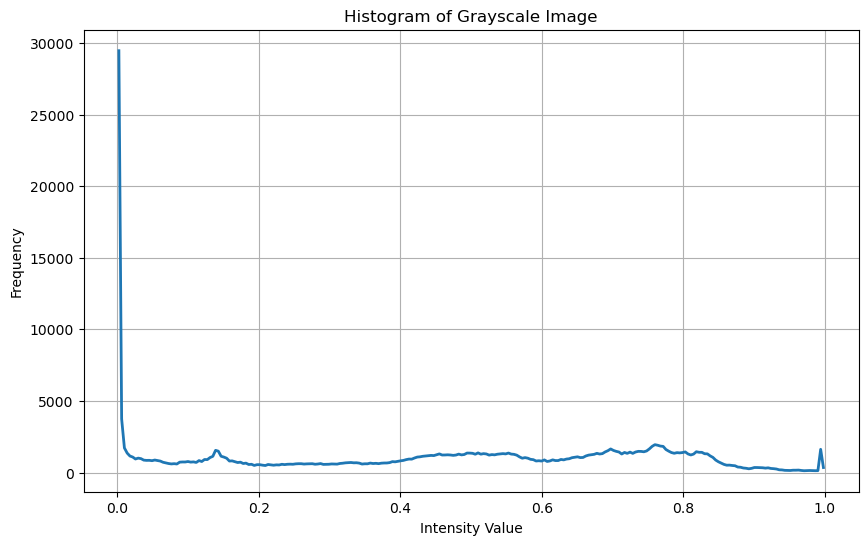

In [171]:
# Reads the astronaut image, converts it to grayscale and computes (and displays) its histogram.

# Loads the necessary libraries
from skimage import data, color, exposure
import matplotlib.pyplot as plt

# Reads the 'astronaut' image from the data module
image = data.astronaut()

# Converts the image to grayscale
gray_image = color.rgb2gray(image)

# Computes the histogram of the grayscale image
hist, bins = exposure.histogram(gray_image)

# Plots the histogram using matplotlib
plt.figure(figsize=(10, 6))

# Plots the histogram
plt.plot(bins, hist, lw=2)
plt.title("Histogram of Grayscale Image")
plt.xlabel("Intensity Value")
plt.ylabel("Frequency")
plt.grid(True)

plt.show()


*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

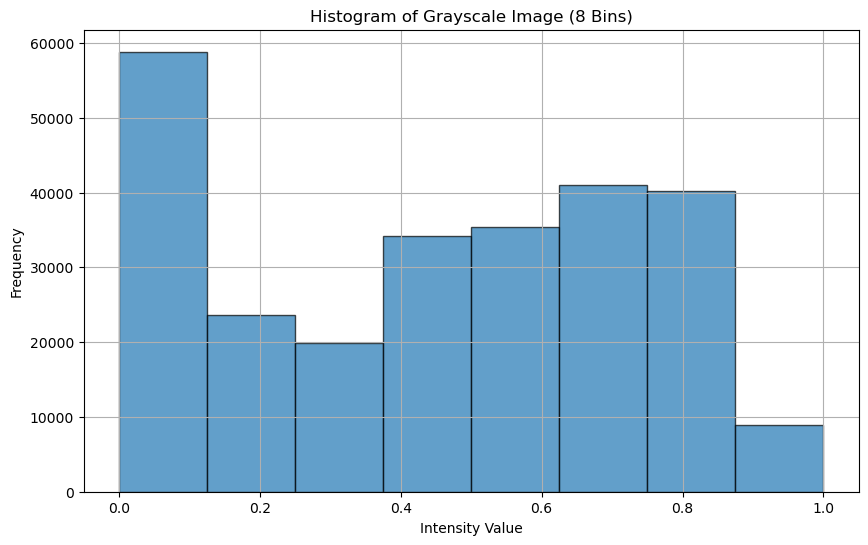

In [173]:
# Reads the astronaut image, converts it to grayscale and computes (and displays) its histogram.

# Loads the necessary libraries
from skimage import data, color
import matplotlib.pyplot as plt
import numpy as np

# Reads the 'astronaut' image from the data module
image = data.astronaut()

# Converts the image to grayscale
gray_image = color.rgb2gray(image)

# Computes the histogram with 8 bins
hist, bins = np.histogram(gray_image, bins=8, range=(0, 1))

# Plots the computed histogram
plt.figure(figsize=(10, 6))

# Computes bin centers for plotting
bin_centers = (bins[:-1] + bins[1:]) / 2

# Plots the histogram
plt.bar(bin_centers, hist, width=(bins[1] - bins[0]), align='center', edgecolor='black', alpha=0.7)
plt.title("Histogram of Grayscale Image (8 Bins)")
plt.xlabel("Intensity Value")
plt.ylabel("Frequency")
plt.grid(True)

plt.show()




*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

Changing the bin count changes how the intensity values are grouped. By changing the bin count to 8, the data is 
grouped into 8 categories/bars. 

As the bin increases, the intensity values are grouped into narrower bins, and
the histogram is much more detailed. Depending on the images, this could, however, introduce more noise into
the histogram.



*   Compute histogram of the color image (without converting it to grayscale).
*   Plot the total histogram and also histogram for each channel (show it in a single plot with differnt legends for each histogram).


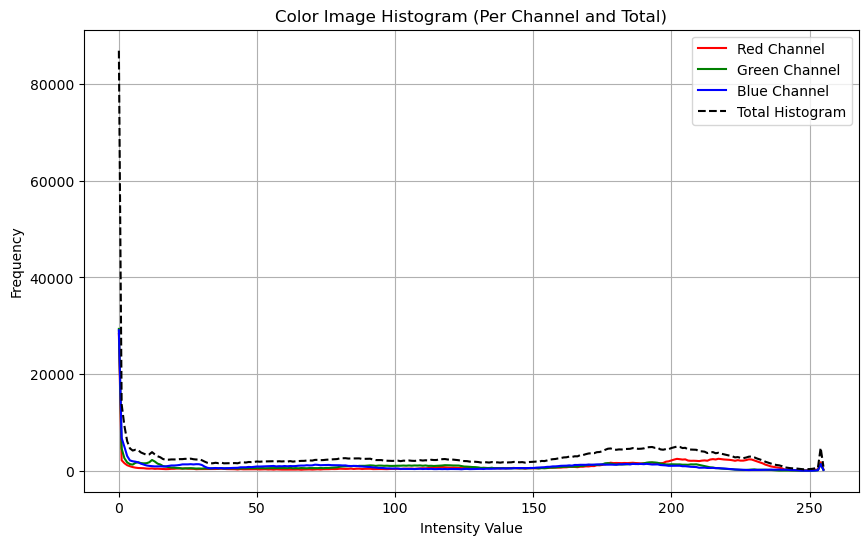

In [178]:

from skimage import data, exposure
import matplotlib.pyplot as plt

# Reads the 'astronaut' image from the data module
image = data.astronaut()

# Computes the histograms for each channel (R, G, B)
red_hist, red_bins = exposure.histogram(image[..., 0])  # Red channel
green_hist, green_bins = exposure.histogram(image[..., 1])  # Green channel
blue_hist, blue_bins = exposure.histogram(image[..., 2])  # Blue channel

# Computes the total histogram (sum of all channels)
total_hist = red_hist + green_hist + blue_hist

# Plots the histograms
plt.figure(figsize=(10, 6))

# Plots histograms for each channel
plt.plot(red_bins, red_hist, color='red', label='Red Channel')
plt.plot(green_bins, green_hist, color='green', label='Green Channel')
plt.plot(blue_bins, blue_hist, color='blue', label='Blue Channel')

# Plots the total histogram
plt.plot(red_bins, total_hist, color='black', label='Total Histogram', linestyle='--')

# Adds labels, legend, and title
plt.title("Color Image Histogram (Per Channel and Total)")
plt.xlabel("Intensity Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)

plt.show()


### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



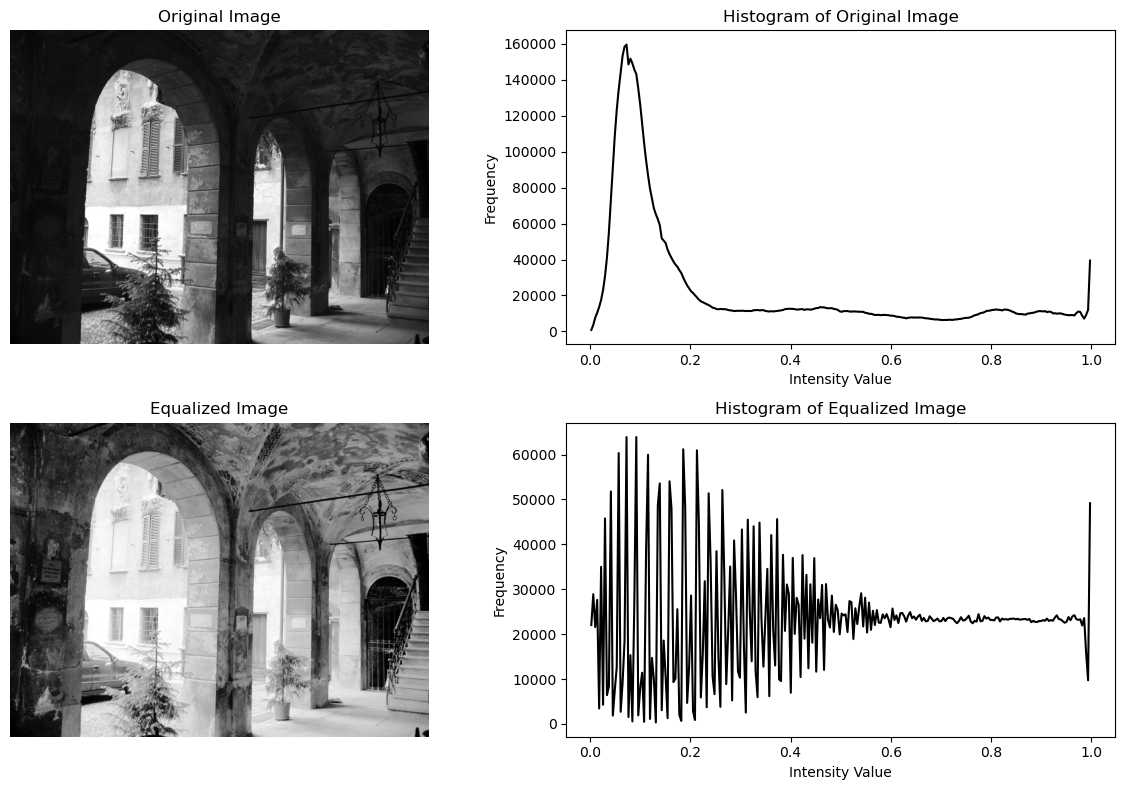

In [184]:
# Computes the histogram for the aquatermi_lowcontrast.jpg image, performs equalization
# to enhance the contrast, computes the histogram of the equalized image, and uses a 
# 2x2 subplot to show both images along with their corresponding histograms.

# Imports the necessary libraries
from skimage import io, exposure, color
import matplotlib.pyplot as plt

# Loads the low-contrast image
image_path = "/Users/sylviaperez-montero/Desktop/lab-computer-vision-main/images/aquatermi_lowcontrast.jpg"
image = io.imread(image_path)

# Converts the image to grayscale
gray_image = color.rgb2gray(image)

# Computes the histogram of the original image
original_hist, original_bins = exposure.histogram(gray_image)

# Performs histogram equalization to enhance the contrast
equalized_image = exposure.equalize_hist(gray_image)

# Computes the histogram of the equalized image
equalized_hist, equalized_bins = exposure.histogram(equalized_image)

# Plots the original image, equalized image, and their histograms
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Original Image
axs[0, 0].imshow(gray_image, cmap='gray')
axs[0, 0].set_title("Original Image")
axs[0, 0].axis("off")

# Histogram of Original Image
axs[0, 1].plot(original_bins, original_hist, color='black')
axs[0, 1].set_title("Histogram of Original Image")
axs[0, 1].set_xlabel("Intensity Value")
axs[0, 1].set_ylabel("Frequency")

# Equalized Image
axs[1, 0].imshow(equalized_image, cmap='gray')
axs[1, 0].set_title("Equalized Image")
axs[1, 0].axis("off")

# Histogram of Equalized Image
axs[1, 1].plot(equalized_bins, equalized_hist, color='black')
axs[1, 1].set_title("Histogram of Equalized Image")
axs[1, 1].set_xlabel("Intensity Value")
axs[1, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()



*   The above function in skimage.exposure uses cdf and interpolation technique to normalize the histogram. How is it different from linear contrast stretch?


**Solution**

# The histogram equalization:

- aims to redistribute intensity values, creating a histogram that is almost
uniform. 
- adjusts the intensities in a non-linear fashion, where as linear contrast stretching adjusts them linearly.
- histogram equalization improves contrast more effectively in areas with low intensity variation, while linear contrast stretch
- preserves the original histogram shape and stretches it.
- histogram equalization appears to be useful for images with poor contrast or uneven illumination. Linear contrast stretching is
  useful for images wit hclipped intensity ranges or mild contrast issues.
...

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch (Do not use an inbuilt function). 
*   Provide grayscale image array and bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



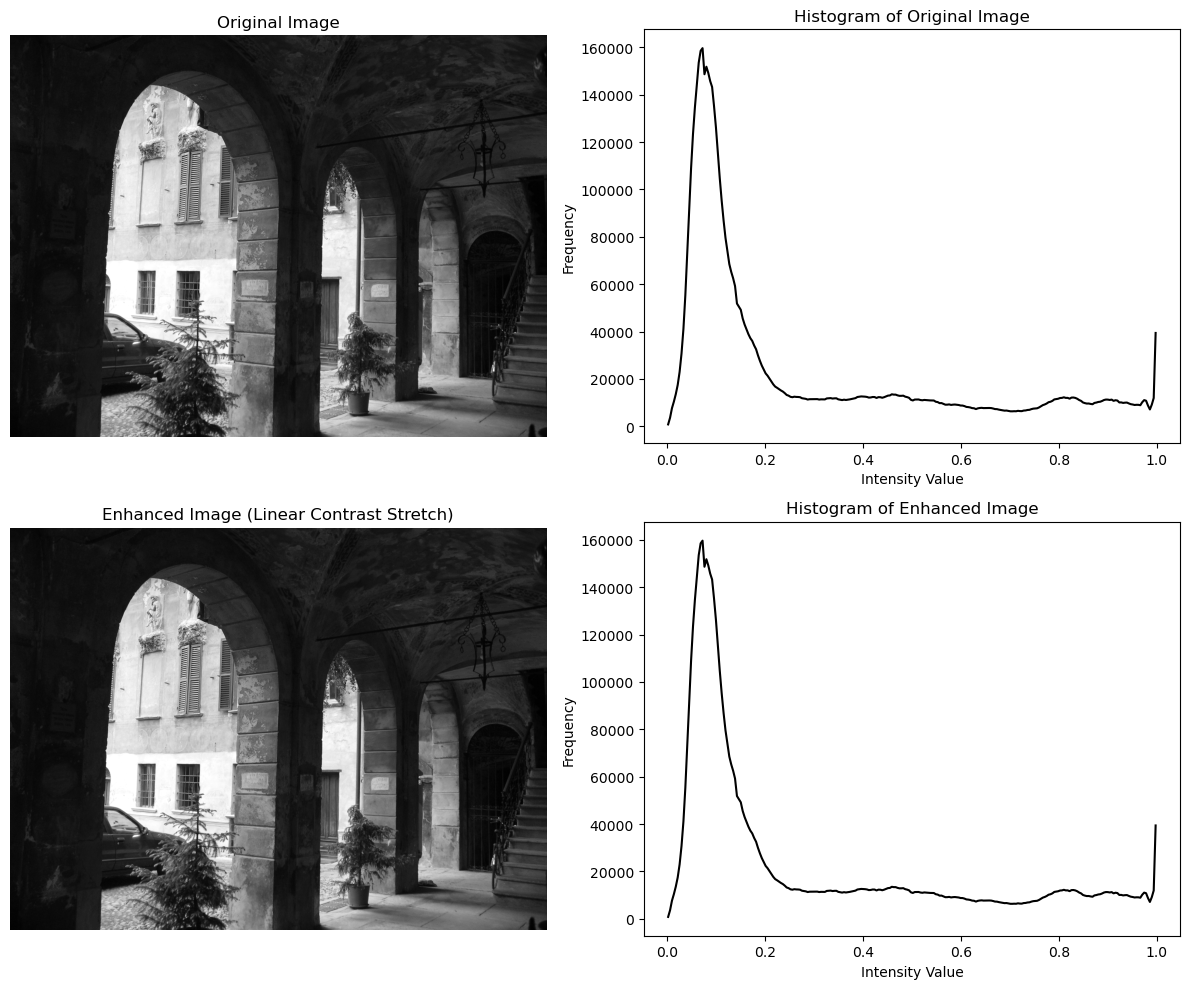

In [188]:
import numpy as np
from skimage import io, color, exposure
import matplotlib.pyplot as plt

# Define a function to perform linear contrast stretching
def linear_contrast_stretch(image_array, bin_count):
    """
    Perform linear contrast stretching on a grayscale image.
    
    Parameters:
        image_array (numpy.ndarray): Input grayscale image array.
        bin_count (int): Number of bins for the histogram.
    
    Returns:
        numpy.ndarray: Enhanced image array after linear contrast stretching.
    """
    # Calculate the minimum and maximum pixel intensity values
    min_intensity = np.min(image_array)
    max_intensity = np.max(image_array)
    
    # Perform linear contrast stretching
    enhanced_image = (image_array - min_intensity) / (max_intensity - min_intensity)
    
    return enhanced_image

# Step 1: Load the low-contrast image
image_path = "/Users/sylviaperez-montero/Desktop/lab-computer-vision-main/images/aquatermi_lowcontrast.jpg"
image = io.imread(image_path)

# Step 2: Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Step 3: Apply linear contrast stretching
bin_count = 256
enhanced_image = linear_contrast_stretch(gray_image, bin_count)

# Step 4: Compute histograms for original and enhanced images
original_hist, original_bins = exposure.histogram(gray_image, nbins=bin_count)
enhanced_hist, enhanced_bins = exposure.histogram(enhanced_image, nbins=bin_count)

# Step 5: Plot the original image, histogram, enhanced image, and corresponding histogram
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Original Image
axs[0, 0].imshow(gray_image, cmap='gray')
axs[0, 0].set_title("Original Image")
axs[0, 0].axis("off")

# Histogram of Original Image
axs[0, 1].plot(original_bins, original_hist, color='black')
axs[0, 1].set_title("Histogram of Original Image")
axs[0, 1].set_xlabel("Intensity Value")
axs[0, 1].set_ylabel("Frequency")

# Enhanced Image
axs[1, 0].imshow(enhanced_image, cmap='gray')
axs[1, 0].set_title("Enhanced Image (Linear Contrast Stretch)")
axs[1, 0].axis("off")

# Histogram of Enhanced Image
axs[1, 1].plot(enhanced_bins, enhanced_hist, color='black')
axs[1, 1].set_title("Histogram of Enhanced Image")
axs[1, 1].set_xlabel("Intensity Value")
axs[1, 1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (selem) of radius 20. *Hint: Structuring elements are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




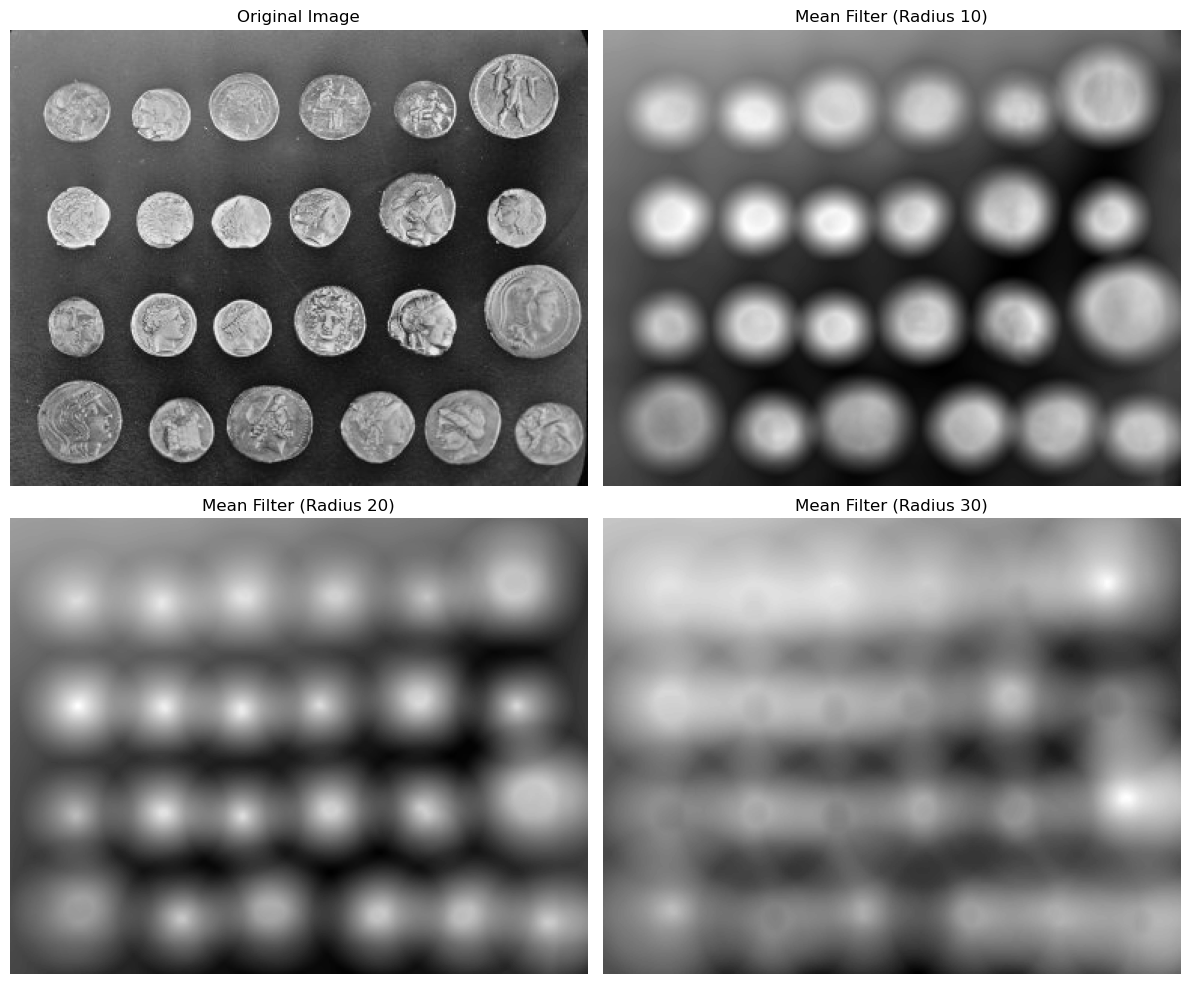

In [192]:
# Imports the necessary libraries
from skimage import data, filters, morphology
import matplotlib.pyplot as plt

# Loads the coins image
coins_image = data.coins()

# Defines a disk structuring element (footprint) of radius 20
# (note: footprint was used instead of selems due to a type error that was ocurring)
footprint_20 = morphology.disk(20)

# Applies the mean filter using the created selem
mean_filtered_20 = filters.rank.mean(coins_image, footprint=footprint_20)

# Increases the radius of the selem by 10 and apply the mean filter
footprint_30 = morphology.disk(30)
mean_filtered_30 = filters.rank.mean(coins_image, footprint=footprint_30)

# Reduces the radius of the selem by 10 and apply the mean filter
footprint_10 = morphology.disk(10)
mean_filtered_10 = filters.rank.mean(coins_image, footprint=footprint_10)

# Visualizes all the smoothened images along with the original image
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Original Image
axs[0, 0].imshow(coins_image, cmap='gray')
axs[0, 0].set_title("Original Image")
axs[0, 0].axis("off")

# Mean Filter with Radius 10
axs[0, 1].imshow(mean_filtered_10, cmap='gray')
axs[0, 1].set_title("Mean Filter (Radius 10)")
axs[0, 1].axis("off")

# Mean Filter with Radius 20
axs[1, 0].imshow(mean_filtered_20, cmap='gray')
axs[1, 0].set_title("Mean Filter (Radius 20)")
axs[1, 0].axis("off")

# Mean Filter with Radius 30
axs[1, 1].imshow(mean_filtered_30, cmap='gray')
axs[1, 1].set_title("Mean Filter (Radius 30)")
axs[1, 1].axis("off")

plt.tight_layout()
plt.show()


*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

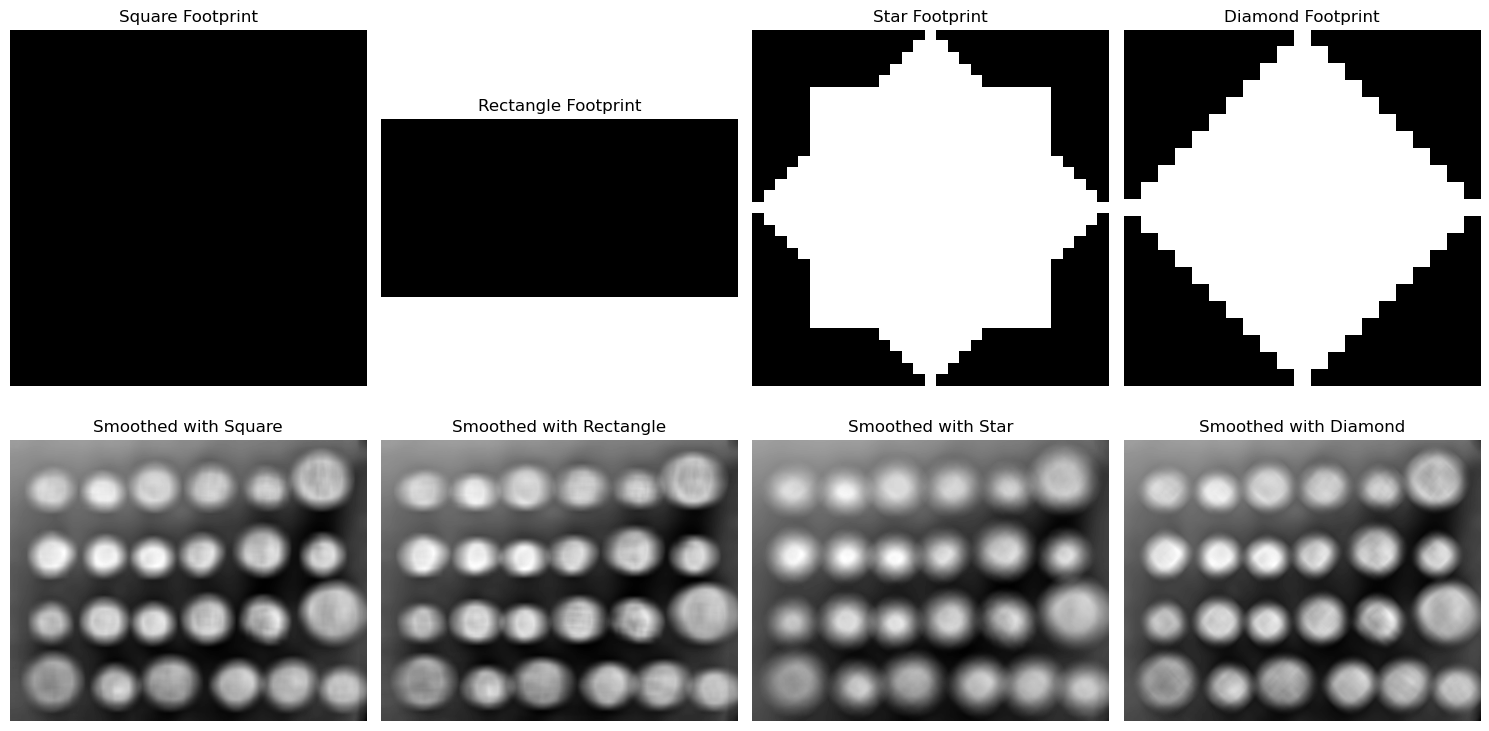

In [194]:
# Import the necessary libraries
from skimage import data, filters, morphology
import matplotlib.pyplot as plt

# Loads the coins image from the data module
coins_image = data.coins()

# Defines different footprints
square_footprint = morphology.square(15)  # Square footprint
rectangle_footprint = morphology.rectangle(10, 20)  # Rectangle footprint
star_footprint = morphology.star(10)  # Star footprint
diamond_footprint = morphology.diamond(10)  # Diamond footprint

# Applies the mean filter using each footprint
mean_filtered_square = filters.rank.mean(coins_image, footprint=square_footprint)
mean_filtered_rectangle = filters.rank.mean(coins_image, footprint=rectangle_footprint)
mean_filtered_star = filters.rank.mean(coins_image, footprint=star_footprint)
mean_filtered_diamond = filters.rank.mean(coins_image, footprint=diamond_footprint)

# Visualizes the footprints and the corresponding smoothened images
footprints = [square_footprint, rectangle_footprint, star_footprint, diamond_footprint]
filtered_images = [
    mean_filtered_square,
    mean_filtered_rectangle,
    mean_filtered_star,
    mean_filtered_diamond,
]
titles = ["Square", "Rectangle", "Star", "Diamond"]

fig, axs = plt.subplots(2, len(footprints), figsize=(15, 8))

# Plots footprints in the first row
for i, footprint in enumerate(footprints):
    axs[0, i].imshow(footprint, cmap="gray")
    axs[0, i].set_title(f"{titles[i]} Footprint")
    axs[0, i].axis("off")

# Plots smoothened images in the second row
for i, filtered_image in enumerate(filtered_images):
    axs[1, i].imshow(filtered_image, cmap="gray")
    axs[1, i].set_title(f"Smoothed with {titles[i]}")
    axs[1, i].axis("off")

plt.tight_layout()
plt.show()


*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

*Changing the radius of the disk*

With larger radius, the disk covers a larger "neighborhood" of pixels for computing the mean. There is a stronger smoothing effect, and the larger the number, edges and smaller details blur.

With smaller radius, the neighborhood is smaller, with less smoothing effect and details preserved better; however, some noise may still remain.


*   What is the observed behaviour with difference in the structuring element?



**Solution**

*The shape of the structuring element*

The shape of the structuring element may impact smoothing significantly, as its shape determines how the pixels are averaged. Noise reduction and edge preservation is also impacted.

For instance, in a square structuring element, the pixels are averaged in a square neighborhood and all pixels are treated equally. A diamond shaped element includes pixels closer to the center and with the corners excluded, and so on.



*   What is the difference between mean filter and gaussian filter?
*   Where do you use mean filters and where do you use gaussian filters?



**Solution**

The mean filter is simple, fast and effective for basic noise reduction. It is used when computational efficiency is important, but the edge details are not. Example: removing salt and pepper noise in a grayscale image.

The Gaussian filter provides better noise reduction and less distortion to edges and small details, thus it is preferred when edge preservation or higher quality results are required. Examples: preprocessing for edge detection, object segmentation.
